# PHYS 381 - Assignment 0
### Siegfried Peschke - 30032136
#### January 16, 2019

## Introduction
In this assignment we explore roundoff error in computing with floating point numbers as well as introducing the plotting of mathematical functions. We explore these topics by considering methods of evaluating polynomials using a computer and take the example of approximating the sine function using the Taylor series.

## Task 1 - Evaluating Polynomials
### Why are the results for evaluating x=0.1 not exactly the same for the forward and reverse methods?  Should we worry about this?
Given a polynomial of order $N$ 

$$ P(x) = a_0 + a_1 x + a_2 x^2 \ldots = \sum\limits_{n=0}^N a_n x^n $$

we can easily evaluate it at any arbitrary point $x_i$

$$ P(x_i) = \sum\limits_{n=0}^N a_n x_i^n $$

We can use the following function to perform this evaluation

In [1]:
def poly_eval_basic_forward(x, coeff): #As given in the lecture notes
    result = 0.0
    for n,c in enumerate(coeff):
        result = result + c * x**n
    return result

Since exponentiation is computationally "expensive".  If we reverse the order of summation then we only need multiplication and addition which will reduce the time required for the calculation

  $$((c_N*x + c_{N-1} )*x + c_{N-2})* x \ldots + c_0$$
  
This is called Horner's method and is performed by the following function

In [2]:
def poly_eval_basic_reverse(x, coeff): #As given in the lecture notes
    result = coeff[-1]
    for c in coeff[-2::-1]:
        result = result * x + c
    return result

Let us use the function %timeit to compare the computational speed of each function

In [3]:
 %timeit poly_eval_basic_forward(0.5, [0,1,2,3,4,5])

1.6 µs ± 183 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
%timeit poly_eval_basic_reverse(0.5, [0,1,2,3,4,5])

818 ns ± 142 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Clearly the Horner method reduces the run time of the function by about 50%. Let us now test the accuracy by using each function to evaluate a polynomial with a large number of coefficients at x = 0.1.

In [5]:
p1 = poly_eval_basic_forward(0.1, range(0,99,1) )
p2 = poly_eval_basic_reverse(0.1, range(0,99,1) )
print( p1, p2, p2-p1)

0.12345679012345678 0.12345679012345681 2.7755575615628914e-17


We know mathematically the two functions are equal, so why do we get a non-zero difference between the two functions evaluation at x=0.1?

The answer lies in how the computer memory system handles floating point numbers. Representing a real number which may have an infinite number of decimal places is difficult when one only has a finite number of bits to do so. Because of this, the result of a floating point calculation must often be rounded in order to fit back into its finite representation. This rounding error is the characteristic feature of floating-point computation.

Since the operations in the two functions are different, the floating point numbers go through a different set of operations. Simply changing the order of operations can effect the result. On top of that, one function performs exponentiation, an operation that the other function does not perform, this also effects the result. What we learn is that the order of operations and the operation itself determine the rounding of a floating point number.

The importance of precision is determined on a case by case basis.  In our given example, we see that the computer provides a precision on the magnitude of $10^{-17}$. If one has a case where high precision is required, the rounding of floating point numbers does become a worry.

## Task 2 - Taylor series expansion of sin(x)
### Write a function which uses numpy to evaluate the Taylor series expansion of sin(x) for an array of x, and an arbitrary number of terms

Take the Taylor series expansion about 0 (MacLaurin series) given by

$$f(x) = \sum\limits_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^{n}$$

Then the Taylor series of $f(x) = \sin(x)$ is

$$sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + ...$$

which simplifies to

$$sin(x) = \sum\limits_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1}$$

In [6]:
import numpy as np

In [7]:
def taylor_sine_series(x, terms, forward_method):
    '''
    We write a function which performs the MacLaurin series expansion of sin(x) given above.
    The variable x is the desired point in which to approximate sin(x) and terms is the variable 
    respresenting the number of terms which will be used to approximate sin(x).
    Begin by calculating the coefficients for each term of the polynomial.
    Then proceed to use either the forward calculation or the Horner backwards calculation from task 1.
    '''
    coeffs = []
    for n in range(terms//2 + 1): #We set this range since we append 2 terms per loop
        coeffs.append(0) #Every even term is a 0
        coefficient = ((-1)**(n))/np.math.factorial(2*n+1) #Calculate the coefficient for every odd term
        coeffs.append(coefficient)

    result = []
    if forward_method == True:
        for t in x:
            result.append(poly_eval_basic_forward(t, coeffs))
    else:
        for t in x:
            result.append(poly_eval_basic_reverse(t, coeffs))
    return result
print("sin(0.5), sin(1), sin(np.pi/2) approximated to 200 terms is", taylor_sine_series([0.5, 1, np.pi/2], 200, False))


sin(0.5), sin(1), sin(np.pi/2) approximated to 200 terms is [0.479425538604203, 0.8414709848078965, 1.0]


### Task 3: Use taylor_sine_series to plot the Taylor series expansions of sin(x) for order n=1, 3, 17, 29 and compare to the "true" value.

In [8]:
import matplotlib.pyplot as plt
import unicodedata

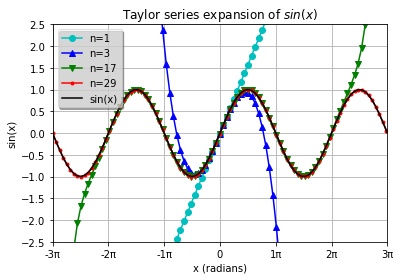

In [9]:
#Create the domain to be plotted
t = np.arange(-3*np.pi, 3*np.pi+0.2, 0.2)

#Set labels for x-axis
pi = unicodedata.lookup("GREEK SMALL LETTER PI")
labels = []
for i in range(-3,4,1):
    if i != 0:
        a = str(i) + pi
        labels.append(a)
    else:
        labels.append(i)
    
#Functions to be plotted
plt.plot(t, taylor_sine_series(t, 1, False), label='n=1', color='c', marker='o')
plt.plot(t, taylor_sine_series(t, 3, False), label='n=3', color='b', marker='^')
plt.plot(t, taylor_sine_series(t, 17, False), label='n=17', color='g', marker='v')
plt.plot(t, taylor_sine_series(t, 29, False), label='n=29', color='r', marker='.')
plt.plot(t, np.sin(t), label='sin(x)', color='k')
#Gridlines
plt.axis([-3*np.pi, 3*np.pi, -2.5, 2.5])
plt.xticks(np.arange(-3*np.pi, 3*np.pi+1, np.pi), labels)
plt.yticks(np.arange(-2.5, 2.6, 0.5))
plt.grid(linestyle='solid')
#Labels
plt.xlabel('x (radians)')
plt.ylabel('sin(x)')
plt.title('Taylor series expansion of $sin(x)$')
#Legend
legend = plt.legend(loc='upper left', shadow=(True))
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)
plt.show()

### Task 4: What are the absolute and the relative error (in percent) for Taylor series expansion of sin(x) at x=0.5 for n=3, 9, 29? Compare results of forward summing to reverse.  How else might we reduce roundoff error?

In [10]:
def taylor_error(x, terms, forward_method):
    #Calculate values
    val = [x]
    taylor_val = taylor_sine_series(val, terms, forward_method)
    sine_val = np.sin(x)
    #Calculate error values
    abs_error = np.abs(taylor_val - sine_val)
    rel_error = np.abs((abs_error / sine_val)*100)
    #Print error values
    np.set_printoptions(precision=2)
    print('Absolute N' + str(terms) + ' error:', '{:.4e}'.format(float(abs_error)))
    print('Relative N' + str(terms) + ' error:', '{:.4e}'.format(float(rel_error)) + '%')


print('Forward Method Results')
taylor_error(0.5, 3, True)
taylor_error(0.5, 9, True)
taylor_error(0.5, 29, True)
print()
print('Backwards Method Results')
taylor_error(0.5, 3, False)
taylor_error(0.5, 9, False)
taylor_error(0.5, 29, False)

Forward Method Results
Absolute N3 error: 2.5887e-04
Relative N3 error: 5.3996e-02%
Absolute N9 error: 1.2213e-11
Relative N9 error: 2.5474e-09%
Absolute N29 error: 0.0000e+00
Relative N29 error: 0.0000e+00%

Backwards Method Results
Absolute N3 error: 2.5887e-04
Relative N3 error: 5.3996e-02%
Absolute N9 error: 1.2213e-11
Relative N9 error: 2.5474e-09%
Absolute N29 error: 0.0000e+00
Relative N29 error: 0.0000e+00%


Comparing the forward method and backward method above, we find no difference in precision between the two. Both methods are in fact identical in terms of the error they produce. This is likely explained by the Taylor series itself being an approximation. The precision of the Taylor series is less than the round off point of the floating point numbers and thus the Taylor series error dominates the floating point rounding error.

It should be noted that when we use the computer to compare the Taylor approximation of sine to the actual sine function, we get a floating point rounding error in the sine function as well.

Reducing the roundoff error can be done by reducing the number of algebraic operations performed as well as increasing the float size.

## Conclusion
From this assignment we find that reducing the number of algebraic operations reduces error in the floating point representation. This knowledge is valuable if one requires a high precision of measurement and is using a computer to perform calculations. On a mathematical note, we also find if one is using a Taylor series to approximate a function, the roundoff error of the computer may be ignored as the Taylor series error dominates.